In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from datetime import datetime
from datetime import timedelta
import calendar
import calmap

In [2]:
# I took notes of any time our downstairs neighbors were particularly loud or obnoxious,
# defined as being louder than the sound of our tv, dishwasher, or level of normal conversation.
# I wrote down approximate start/end times as well as the type of disturbance defined as either
# 'bass', 'weed', or 'shouting'
df = pd.read_csv('noise.csv')

In [3]:
df.head()

,date,start,end,type
0,9/21/19,2:30pm,4:00pm,bass
1,9/22/19,4:15pm,4:40pm,bass
2,9/22/19,9:30pm,10:30pm,bass
3,10/1/19,11:00pm,11:15pm,bass
4,10/4/19,10:00pm,10:30pm,bass


In [4]:
# convert start/end times to datetimes
df['startTime'] = df.apply(lambda x: datetime.strptime(x['date'] + ' ' + x['start'], '%m/%d/%y %I:%M%p'), axis=1)
df['endTime'] = df.apply(lambda x: datetime.strptime(x['date'] + ' ' + x['end'], '%m/%d/%y %I:%M%p'), axis=1)

In [5]:
df.head()

,date,start,end,type,startTime,endTime
0,9/21/19,2:30pm,4:00pm,bass,2019-09-21 14:30:00,2019-09-21 16:00:00
1,9/22/19,4:15pm,4:40pm,bass,2019-09-22 16:15:00,2019-09-22 16:40:00
2,9/22/19,9:30pm,10:30pm,bass,2019-09-22 21:30:00,2019-09-22 22:30:00
3,10/1/19,11:00pm,11:15pm,bass,2019-10-01 23:00:00,2019-10-01 23:15:00
4,10/4/19,10:00pm,10:30pm,bass,2019-10-04 22:00:00,2019-10-04 22:30:00


In [6]:
# Get the duration. Subtracting datetimes produces a timedelta. Timedeltas are represented
# as a tuple (minutes, seconds), but we just need the total seconds
df['duration'] = df.apply(lambda x: (x['endTime'].to_pydatetime() - x['startTime'].to_pydatetime()).total_seconds(), axis=1)

In [7]:
df['weekday'] = df.apply(lambda x: calendar.day_name[x['startTime'].weekday()], axis=1)
df['month'] = df.apply(lambda x: x['startTime'].strftime('%B'), axis=1)
df['monthYear'] = df.apply(lambda x: x['startTime'].strftime('%b %y'), axis=1)

In [8]:
df.head()

,date,start,end,type,startTime,endTime,duration,weekday,month,monthYear
0,9/21/19,2:30pm,4:00pm,bass,2019-09-21 14:30:00,2019-09-21 16:00:00,5400.0,Saturday,September,Sep 19
1,9/22/19,4:15pm,4:40pm,bass,2019-09-22 16:15:00,2019-09-22 16:40:00,1500.0,Sunday,September,Sep 19
2,9/22/19,9:30pm,10:30pm,bass,2019-09-22 21:30:00,2019-09-22 22:30:00,3600.0,Sunday,September,Sep 19
3,10/1/19,11:00pm,11:15pm,bass,2019-10-01 23:00:00,2019-10-01 23:15:00,900.0,Tuesday,October,Oct 19
4,10/4/19,10:00pm,10:30pm,bass,2019-10-04 22:00:00,2019-10-04 22:30:00,1800.0,Friday,October,Oct 19


In [89]:
# Woohoo we have data! Now lets make some graphics
getMonthNum = lambda x:  datetime.strptime(x['monthYear'], '%b %y').strftime('%m')
getYearNum = lambda x:  datetime.strptime(x['monthYear'], '%b %y').strftime('%y')

In [232]:
# Which months are the worst for disruption?
durationByMonthYear = df.groupby(['monthYear'], as_index=False).sum()
durationByMonthYear['month'] = durationByMonthYear.apply(getMonthNum, axis=1)
durationByMonthYear['year'] = durationByMonthYear.apply(getYearNum, axis=1)

durationByMonthYear = durationByMonthYear.sort_values(['year', 'month']).reset_index(drop=True)
sortLabels=durationByMonthYear['monthYear']
durationByMonthYear

,monthYear,duration,hour,month,year
0,Sep 19,10500.0,51,09,19
1,Oct 19,54540.0,299,10,19
2,Nov 19,173220.0,364,11,19
3,Dec 19,72060.0,343,12,19
4,Jan 20,155820.0,470,01,20
5,Feb 20,126720.0,306,02,20


In [233]:
sortLabels

0    Sep 19
1    Oct 19
2    Nov 19
3    Dec 19
4    Jan 20
5    Feb 20
Name: monthYear, dtype: object

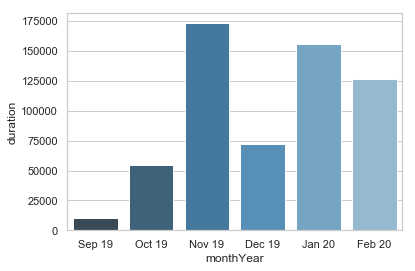

In [56]:
# Duration (in seconds) per month
ax = sns.barplot(x=durationByMonthYear['monthYear'], 
                 y=durationByMonthYear["duration"], 
                 order=sortLabels,
                 palette='Blues_d')
# November and January were rough.

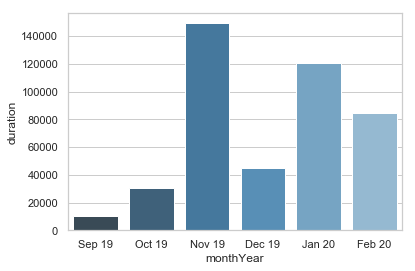

In [92]:
# Just the bass
noiseByMonth = df[df['type'] == 'bass'].groupby(['monthYear'], as_index=False).sum()
noiseByMonth['month'] = noiseByMonth.apply(getMonthNum, axis=1)
noiseByMonth['year'] = noiseByMonth.apply(getYearNum, axis=1)

noiseByMonth.sort_values(['year', 'month']).reset_index(drop=True)
ax = sns.barplot(noiseByMonth['monthYear'], 
                 noiseByMonth["duration"],
                 order=sortLabels,
                 palette='Blues_d')
# Amazing. Almost identical

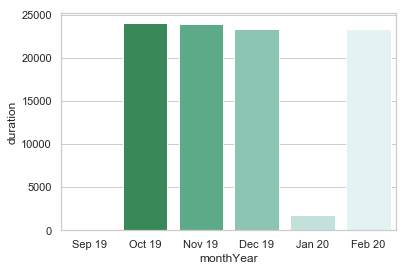

In [93]:
# Just the weed this time
stankByMonth = df[df['type'] == 'weed'].groupby(['monthYear'], as_index=False).sum()
stankByMonth['month'] = stankByMonth.apply(getMonthNum, axis=1)
stankByMonth['year'] = stankByMonth.apply(getYearNum, axis=1)

stankByMonth.sort_values(['year', 'month']).reset_index(drop=True)
ax = sns.barplot(stankByMonth['monthYear'], 
                 stankByMonth["duration"],
                 order=sortLabels,
                 palette='BuGn_r')
# Dry january?

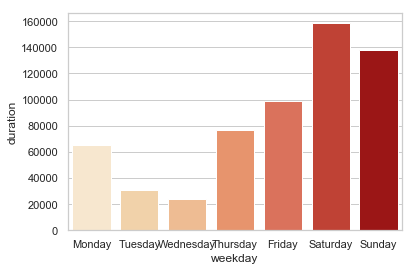

In [82]:
# Which days of the week had the most disruption?
durationByWeekday = df.groupby(['weekday'], as_index=False).sum()
durationByWeekday.sort_values(['weekday']).reset_index(drop=True)
ax = sns.barplot(durationByWeekday['weekday'], 
                 durationByWeekday["duration"],
                 order=calendar.day_name,
                 palette='OrRd')
# No surprise there, weekends are the busiest. Unfortunately it looks like mondays didn't
# slow them down as much as I would have liked

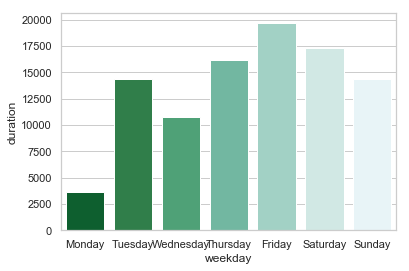

In [83]:
# Which days of the week are the stinkiest?
stinkByWeekday = df[df['type'] == 'weed'].groupby(['weekday'], as_index=False).sum()
stinkByWeekday.sort_values(['weekday']).reset_index(drop=True)
ax = sns.barplot(stinkByWeekday['weekday'], 
                 stinkByWeekday["duration"],
                 order=calendar.day_name,
                 palette='BuGn_r')
# #weDontSmokeOnMondays

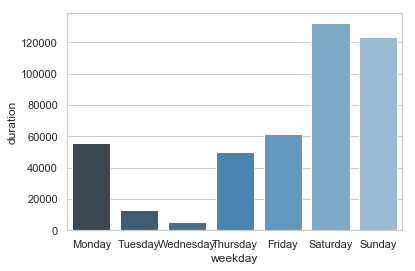

In [85]:
# Which days of the week are noisiest
noiseByWeekday = df[df['type'] == 'bass'].groupby(['weekday'], as_index=False).sum()
noiseByWeekday.sort_values(['weekday']).reset_index(drop=True)
ax = sns.barplot(noiseByWeekday['weekday'], 
                 noiseByWeekday["duration"],
                 order=calendar.day_name,
                 palette='Blues_d')
# WUBWUBWUBWUBWUBWUBWUB

In [160]:
#  https://pythonhosted.org/calmap/
# Need to index by DatetimeIndex for calmap
calFormatted = df[['date','duration']]
calFormatted['date'] = calFormatted.apply(lambda x: datetime.strptime(x['date'], '%m/%d/%y'), axis=1)
calFormatted = calFormatted.groupby(['date'], as_index=True).sum()
events = calFormatted.iloc[0:,0] # Convert to series for calmap

/Users/Pat_Berard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24237d68>,
       dtype=object))

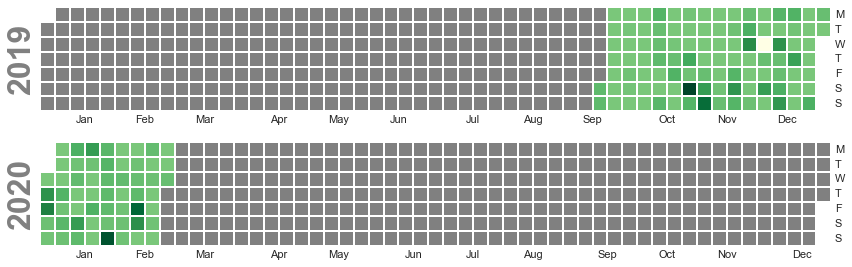

In [174]:
calmap.calendarplot(
    events,
    daylabels='MTWTFSS',
    cmap='YlGn',
    fig_kws=dict(figsize=(12, 4)),
    fillcolor='grey',
    yearlabels=True
)

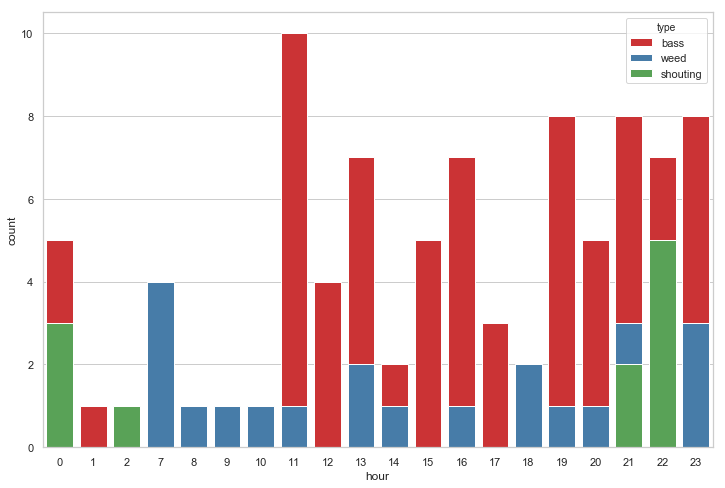

In [240]:
byHour = df
byHour['hour'] = byHour.apply(lambda x: x['startTime'].hour, axis=1)
byHour.groupby(['hour'], as_index=True).count()

# Time of day noise started grouped by type of disturbance
plt.figure(figsize=(12,8))
ax = sns.countplot(
    x='hour', 
    data=byHour, 
    hue='type', 
    dodge=False,
    palette=sns.color_palette("Set1")
)

In [239]:
# Which day had the longest duration of noise
df[df['duration'] == df['duration'].max()]
# 11/2/19 wins for WORST DAY OF BASS

,date,start,end,type,startTime,endTime,duration,weekday,month,monthYear,hour
26,11/2/19,11:00am,11:00pm,bass,2019-11-02 11:00:00,2019-11-02 23:00:00,43200.0,Saturday,November,Nov 19,11
